This assignment is part III of your evaluation process. You should address every question of the assignment on the cell below. If you decide to write any explanation, you should do so commenting on your code cells or by creating a new markdown cell. Feel free to edit our customize the notebook as you wish, as long as it can be easily reproduced for evaluation.

**Name:** Mariana Marinho da Silva Andrade

**CPF**: 134.675.564-77

**Date**: 02/06/2024

# Assignment 2 - Exploratory Data Analysis (EDA)

When you first get your data, it’s very tempting to immediately begin fitting models and assessing how they perform. However, before you begin modeling, it’s absolutely essential to explore the structure of the data and the relationships between the variables in the data set.

Do a detailed EDA of the **ames_train** data set, to learn about the structure of the data and the relationships between the variables in the data set . Your EDA should involve creating and reviewing many plots/graphs and considering the patterns and relationships you see.

You may find out that the data could use some cleaning.

After you have explored completely, make sure you create at least four graphs/plots that you found most informative during your EDA process, and briefly explain what you learned from each (why you found each informative).

PS: notice that the first column is in index, you might not need to import it

### Important:

You may use any libraries you want. However a 'requirements.txt' file is expected, so that the necessary dependencies can be installed in a virtual environment using the command 'pip install requirements.txt'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv('ames_train.csv', delimiter=';', index_col='Unnamed: 0')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              1000 non-null   int64  
 1   area             1000 non-null   int64  
 2   price            1000 non-null   int64  
 3   MS.SubClass      1000 non-null   int64  
 4   MS.Zoning        1000 non-null   object 
 5   Lot.Frontage     833 non-null    float64
 6   Lot.Area         1000 non-null   int64  
 7   Street           1000 non-null   object 
 8   Alley            67 non-null     object 
 9   Lot.Shape        1000 non-null   object 
 10  Land.Contour     1000 non-null   object 
 11  Utilities        1000 non-null   object 
 12  Lot.Config       1000 non-null   object 
 13  Land.Slope       1000 non-null   object 
 14  Neighborhood     1000 non-null   object 
 15  Condition.1      1000 non-null   object 
 16  Condition.2      1000 non-null   object 
 17  Bldg.Type        10

In [3]:
df_train.head()

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
1,40000,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,40001,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,40002,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,40003,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,40004,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
# função para descobrir as colunas com valores nan
def percent_missing(df):
    percent_nan = df.isna().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan
percent_missing(df_train)

Total.Bsmt.SF     0.001
Garage.Cars       0.001
Bsmt.Half.Bath    0.001
Bsmt.Full.Bath    0.001
Garage.Area       0.001
Bsmt.Unf.SF       0.001
BsmtFin.SF.2      0.001
BsmtFin.SF.1      0.001
Mas.Vnr.Area      0.007
BsmtFin.Type.2    0.022
BsmtFin.Type.1    0.022
Bsmt.Cond         0.022
Bsmt.Qual         0.022
Bsmt.Exposure     0.023
Garage.Type       0.046
Garage.Qual       0.048
Garage.Cond       0.048
Garage.Yr.Blt     0.048
Garage.Finish     0.048
Lot.Frontage      0.167
Fireplace.Qu      0.491
Mas.Vnr.Type      0.600
Fence             0.798
Alley             0.933
Misc.Feature      0.971
Pool.QC           0.997
dtype: float64

In [5]:
nan_percent = df_train.isna().mean()            #calcular o percentual de dados faltantes para cada coluna
limite = 0.2
colunas_removidas = nan_percent[nan_percent > limite].index           #colunas que tem mais que 80% dos valores cheios

df_train.drop(columns=colunas_removidas, inplace=True)
print("Colunas mantidas:", df_train.columns)

Colunas mantidas: Index(['PID', 'area', 'price', 'MS.SubClass', 'MS.Zoning', 'Lot.Frontage',
       'Lot.Area', 'Street', 'Lot.Shape', 'Land.Contour', 'Utilities',
       'Lot.Config', 'Land.Slope', 'Neighborhood', 'Condition.1',
       'Condition.2', 'Bldg.Type', 'House.Style', 'Overall.Qual',
       'Overall.Cond', 'Year.Built', 'Year.Remod.Add', 'Roof.Style',
       'Roof.Matl', 'Exterior.1st', 'Exterior.2nd', 'Mas.Vnr.Area',
       'Exter.Qual', 'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond',
       'Bsmt.Exposure', 'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2',
       'BsmtFin.SF.2', 'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC',
       'Central.Air', 'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF',
       'Low.Qual.Fin.SF', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Garage.Type',
       'Garage.Yr.Blt', 'Garage.Finish', 'Garage.Cars', 'G

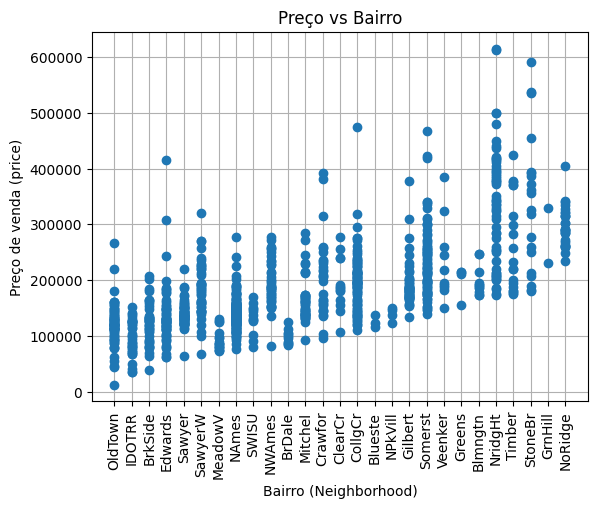

In [6]:
# qual o bairro mais caro

x = list(df_train['Neighborhood'])
y = list(df_train['price'])
y, x = zip(*sorted(zip(y, x)))      # ordenação com base em x

plt.plot(x,y,'o')
plt.xlabel('Bairro (Neighborhood)')
plt.xticks(rotation='vertical')
plt.ylabel('Preço de venda (price)')
plt.title('Preço vs Bairro')
plt.grid()

O gráfico mostra claramente uma relação de bairro X preço de casas.

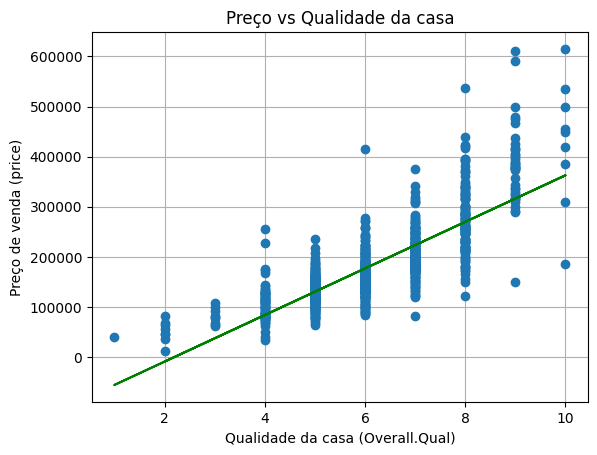

In [7]:
# qual a relação da qualidade da casa com o preço

x = list(df_train['Overall.Qual'])
y = list(df_train['price'])
y, x = zip(*sorted(zip(y, x)))

plt.plot(x,y,'o')
plt.xlabel('Qualidade da casa (Overall.Qual)')
plt.ylabel('Preço de venda (price)')
plt.title('Preço vs Qualidade da casa')
plt.grid()

# criar funcao linear para mostrar a relacao
z = np.polyfit(x, y, 1)         # saber inclinação e interseção da reta
p = np.poly1d(z)            #funcao linear para exibir a reta
plt.plot(x,p(x),"g")
plt.show()

O gráfico mostra uma relação de qualidade da casa X preço de casas.

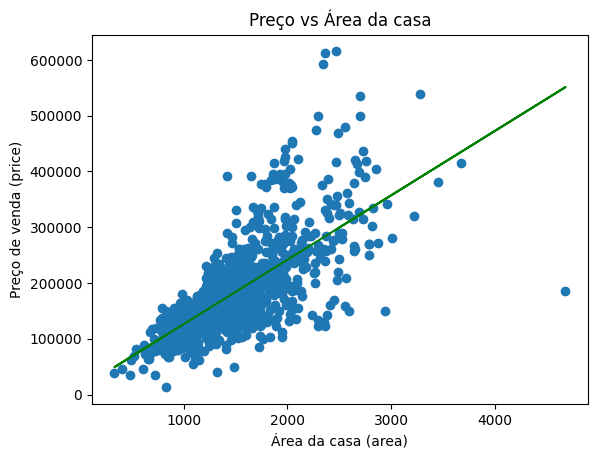

In [8]:
# qual a relaçao do preco com a area da casa

x = list(df_train['area'])
y = list(df_train['price'])
y, x = zip(*sorted(zip(y, x)))

plt.plot(x,y,'o')
plt.xlabel('Área da casa (area)')
plt.ylabel('Preço de venda (price)')
plt.title('Preço vs Área da casa')

# criar funcao linear para mostrar a relacao
z = np.polyfit(x, y, 1)         # saber inclinação e interseção da reta
p = np.poly1d(z)            #funcao linear para exibir a reta
plt.plot(x,p(x),"g")
plt.show()

O preço também se mostra relacionado diretamente com a área habitável da casa.

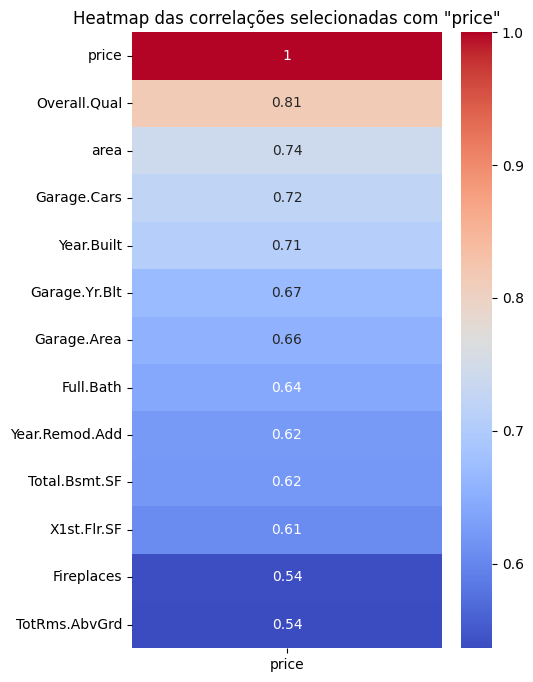

In [9]:
numeric_data = df_train.apply(pd.to_numeric, errors='coerce')           #converte todos os dados para numericos

corr_matrix = numeric_data.corr(method='spearman')         #calcular a matriz de correlação usando o método de Spearman
corr_sort = corr_matrix['price'].sort_values(ascending=False)
corr_chosen = corr_sort[(corr_sort > 0.5) | (corr_sort < -0.5)].index            #correlações que são maiores que 50%

corr_matrix_chosen = corr_matrix.loc[corr_chosen, ['price']]         # matriz de correlação com as variáveis selecionadas

# heatmap das correlações selecionadas
plt.figure(figsize=(5, 8))
sns.heatmap(corr_matrix_chosen, annot=True, cmap='coolwarm')
plt.title('Heatmap das correlações selecionadas com "price"')
plt.show()

O heatmap acima destaca as variáveis numéricas que têm maior correlação com a coluna 'preço'. Esses resultados são intuitivos, pois refletem a qualidade e o porte da casa, como o número de banheiros, o ano de construção e a capacidade da garagem, entre outros fatores.

Pelo que podemos perceber com os gráficos acima, o preço da casa está diretamente relacionado com sua área, qualidade e o bairro em que está localizada. No heatmap, podemos ver as colunas com valores numéricos que mais se correlacionam com o valor da casa, como a qualidade geral da casa, a área, o número de carros na garagem e o ano de construção, entre outros fatores.

# Predicting house prices

In building a model, it is often useful to start by creating a simple, intuitive initial model based on the results of the exploratory data analysis. 

You may feel like showcasing more advanced statistical skills. For this reason, we are providing testing data on *ames_test* data set so you can build a very simple model in order to predict the house prices given the data available on training data set. Use your imagination and let 

Note: The goal is not to identify the “best” possible model but rather to choose a reasonable and understandable starting point.

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, log_loss
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [11]:
ames_train = pd.read_csv('ames_train.csv', delimiter=';')
ames_test = pd.read_csv('ames_test.csv', delimiter=';')

x_train = ames_train.drop('price', axis=1)  
y_train = ames_train['price']       
        
x_test = ames_test.drop('price', axis=1)    
y_test = ames_test['price']                 

num_features = x_train.select_dtypes(include=[np.number]).columns.tolist()          #colunas numéricas
cat_features = x_train.select_dtypes(include=[object]).columns.tolist()         #colunas categóricas

In [12]:
#transformação de dados
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),           # valores ausentes nas colunas numéricas usando a mediana
    ('scaler', StandardScaler())            # padroniza as colunas numéricas
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),           # valores ausentes nas colunas categóricas usando a moda
    ('onehot', OneHotEncoder(handle_unknown='ignore'))          # codifica usando one-hot encoding
])

#transformer para pré-processamento de dados
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, num_features), 
        ('categorical', categorical_transformer, cat_features)  
    ])

In [13]:
# craição do modelo de regressão linear
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', LinearRegression())  
])

linear_model.fit(x_train, y_train)          # treinamento
y_pred_linear = linear_model.predict(x_test)  # previsao

In [14]:
# criação do modelo de regressor gradientboost
gradient_boost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', GradientBoostingRegressor())  
])

gradient_boost_model.fit(x_train, y_train)          # treinamento
y_pred_gradientboost = gradient_boost_model.predict(x_test)  # previsao

In [15]:
#avaliação do modelo regressao linear
mae_linear = mean_absolute_error(y_test, y_pred_linear)  
mse_linear = mean_squared_error(y_test, y_pred_linear)   
r2_linear = r2_score(y_test, y_pred_linear)      
score_linear = linear_model.score(x_test,y_test)  

#avaliação do modelo gradient boost
mae_gradientboost = mean_absolute_error(y_test, y_pred_gradientboost)  
mse_gradientboost = mean_squared_error(y_test, y_pred_gradientboost)   
r2_gradientboost = r2_score(y_test, y_pred_gradientboost)    
score_gradientboost = gradient_boost_model.score(x_test,y_test)  

# Valores das métricas dos dois modelos
print('****  LINEAR REGRESSION  ****')
print(f"Score: {score_linear*100:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_linear:,.2f}")
print(f"Mean Squared Error (MSE): {mse_linear:,.2f}")
print(f"R^2 Score: {r2_linear*100:.2f}%")

print('\n\n****  GRADIENT BOOST  ****')
print(f"Score: {score_gradientboost*100:.2f}%")
print(f"Mean Absolute Error (MAE): {mae_gradientboost:,.2f}")
print(f"Mean Squared Error (MSE): {mse_gradientboost:,.2f}")
print(f"R^2 Score: {r2_gradientboost*100:.2f}%")

****  LINEAR REGRESSION  ****
Score: 89.41%
Mean Absolute Error (MAE): 16,062.56
Mean Squared Error (MSE): 560,591,499.09
R^2 Score: 89.41%


****  GRADIENT BOOST  ****
Score: 89.58%
Mean Absolute Error (MAE): 14,602.16
Mean Squared Error (MSE): 551,252,711.76
R^2 Score: 89.58%


In [16]:
# Função para curva
def func_fit(x, a, b, c):
    return a * x + b * x**2 + c

# Ajuste da curva
parametros_gradientboost, _ = curve_fit(func_fit, y_test, y_pred_gradientboost)
parametros_linear, _ = curve_fit(func_fit, y_test, y_pred_linear)

# parametros do ajuste
a_gradient, b_gradient, c_gradient = parametros_gradientboost
a_linear, b_linear, c_linear = parametros_linear
print('****  LINEAR REGRESSION  ****')
print(f"y = {a_linear:.5f} * x + {b_linear:.5f} * x^2 + {c_linear:.5f}")
print('\n****  GRADIENT BOOST  ****')
print(f"y = {a_gradient:.5f} * x + {b_gradient:.5f} * x^2 + {c_gradient:.5f}\n")

# valores para plotar a curva ajustada
x_range = np.linspace(min(y_test), max(y_test), 500)
y_line_linear = func_fit(x_range, a_linear, b_linear, c_linear)
y_line_gradient = func_fit(x_range, a_gradient, b_gradient, c_gradient)

****  LINEAR REGRESSION  ****
y = 1.19299 * x + -0.00000 * x^2 + -8874.29548

****  GRADIENT BOOST  ****
y = 1.17439 * x + -0.00000 * x^2 + -9552.48146



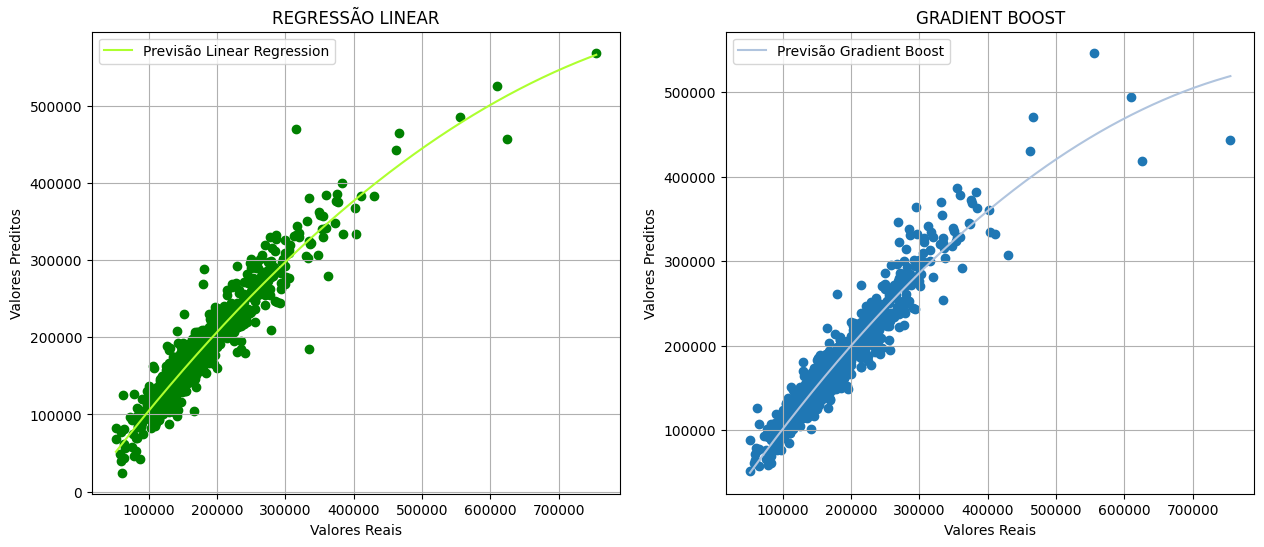

In [17]:
# gráfico LinearRegression()
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, color='green') 
plt.plot(x_range, y_line_linear, color="greenyellow", label="Previsão Linear Regression")
plt.xlabel("Valores Reais")             
plt.ylabel("Valores Preditos")          
plt.title("REGRESSÃO LINEAR") 
plt.legend()
plt.grid(True)                         

#grafico GradientBoostRegression()
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gradientboost)  
plt.plot(x_range, y_line_gradient, color="lightsteelblue", label="Previsão Gradient Boost")
plt.xlabel("Valores Reais")             
plt.ylabel("Valores Preditos")          
plt.title("GRADIENT BOOST")  
plt.legend()
plt.grid(True)                          
plt.show()                              

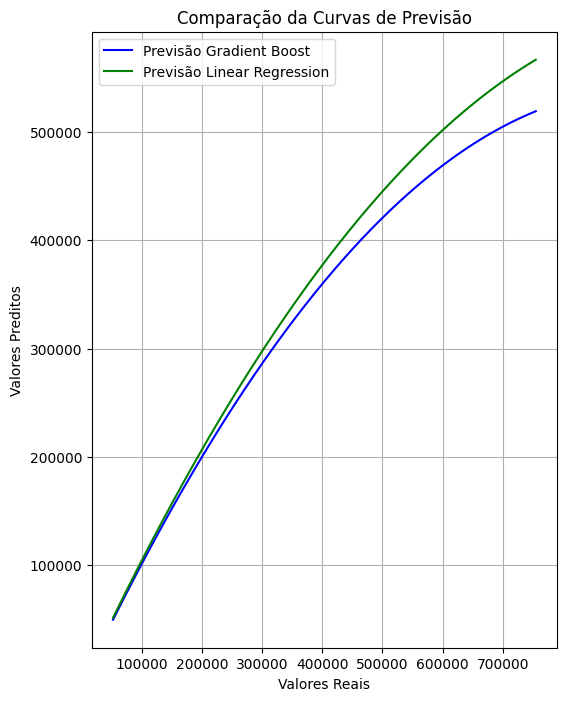

In [25]:
# Comparação só das curvas
plt.figure(figsize=(6, 8))
plt.plot(x_range, y_line_gradient, color="blue", label="Previsão Gradient Boost")
plt.plot(x_range, y_line_linear, color="green", label="Previsão Linear Regression")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Comparação da Curvas de Previsão")
plt.legend()
plt.grid(True)
plt.show()

Com base nas métricas analisadas, o modelo GradientBoostRegression apresentou um score de 89,84%, superior ao LinearRegression, que obteve 89,41%, conforme demonstrado nos gráficos acima. Além disso, o modelo GradientBoost também apresentou menor erro absoluto médio (MAE: 14,613.42) e menor erro quadrático médio (MSE: 537,844,730.96) em comparação com o LinearRegression (MAE: 16,062.56 e MSE: 560,591,499.09). Contudo, o tempo de execução do GradientBoost foi significativamente maior, levando 1 segundo, enquanto a regressão linear levou apenas 0,1 segundos. Portanto, na minha opinião, o modelo de regressão linear é mais viável devido à diferença de score não ser expressiva, enquanto a diferença no tempo de treinamento é um pouco mais expressiva.